In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


df = pd.read_csv('credit_card_fraud_dataset.csv')


df = df.drop(columns=['TransactionID', 'MerchantID'])


df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek
df['Hour'] = df['TransactionDate'].dt.hour
df = df.drop(columns=['TransactionDate'])


X = df.drop('IsFraud', axis=1)
y = df['IsFraud']


numerical_features = ['Amount', 'DayOfWeek', 'Hour']
categorical_features = ['TransactionType', 'Location']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)


print("Class distribution of training data after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution of training data after SMOTE:
IsFraud
0    69300
1    69300
Name: count, dtype: int64


--- Training Logistic Regression ---

--- Evaluation for Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.54      0.70     29700
           1       0.01      0.43      0.02       300

    accuracy                           0.54     30000
   macro avg       0.50      0.49      0.36     30000
weighted avg       0.98      0.54      0.69     30000

Confusion Matrix:


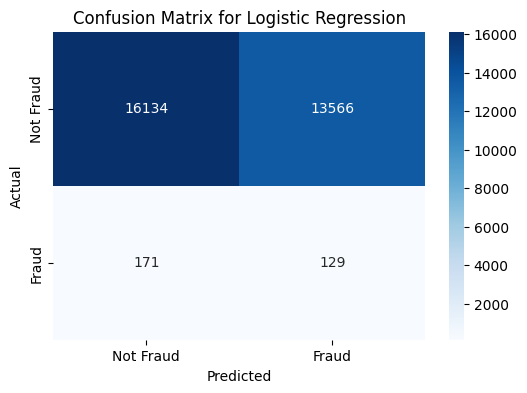


ROC-AUC Score: 0.4724


--- Training Random Forest ---

--- Evaluation for Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     29700
           1       0.01      0.02      0.01       300

    accuracy                           0.97     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.98      0.97      0.98     30000

Confusion Matrix:


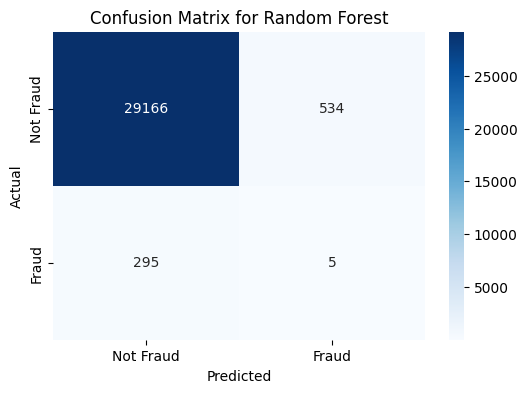


ROC-AUC Score: 0.5203


--- Training Gradient Boosting ---

--- Evaluation for Gradient Boosting ---
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29700
           1       0.02      0.01      0.01       300

    accuracy                           0.98     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.98      0.98      0.98     30000

Confusion Matrix:


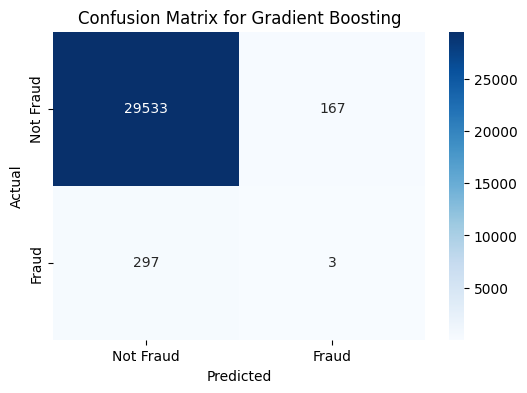


ROC-AUC Score: 0.5022




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


X_test_processed = preprocessor.transform(X_test)


for name, model in models.items():
    print(f"--- Training {name} ---")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_processed)
    y_proba = model.predict_proba(X_test_processed)[:, 1]


    print(f"\n--- Evaluation for {name} ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_")}.png')
    plt.show()

    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")
    print("\n" + "="*50 + "\n")

In [ ]:

new_transaction_data = {
    'Amount': [5000],
    'TransactionType': ['purchase'],
    'Location': ['London'],
    'DayOfWeek': [1],
    'Hour': [14]
}

new_transaction_df = pd.DataFrame(new_transaction_data)


new_transaction_processed = preprocessor.transform(new_transaction_df)


rf_model = models['Random Forest']
prediction = rf_model.predict(new_transaction_processed)
probability = rf_model.predict_proba(new_transaction_processed)[:, 1]

print(f"Prediction for the new transaction: {'Fraud' if prediction[0] == 1 else 'Not Fraud'}")
print(f"Probability of being Fraud: {probability[0]:.4f}")

Prediction for the new transaction: Not Fraud
Probability of being Fraud: 0.0500


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


df = pd.read_csv('credit_card_fraud_dataset.csv')


df = df.drop(columns=['TransactionID', 'MerchantID'])

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek
df['Hour'] = df['TransactionDate'].dt.hour
df = df.drop(columns=['TransactionDate'])

X = df.drop('IsFraud', axis=1)
y = df['IsFraud']


numerical_features = ['Amount', 'DayOfWeek', 'Hour']
categorical_features = ['TransactionType', 'Location']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)


rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train_resampled, y_train_resampled)


new_transaction_data = {
    'Amount': [7500],
    'TransactionType': ['withdrawal'],
    'Location': ['London'],
    'DayOfWeek': [6],
    'Hour': [3]
}

new_transaction_df = pd.DataFrame(new_transaction_data)

new_transaction_processed = preprocessor.transform(new_transaction_df)


prediction = rf_model.predict(new_transaction_processed)
probability = rf_model.predict_proba(new_transaction_processed)[:, 1]

print(f"Prediction for the new transaction: {'Fraud' if prediction[0] == 1 else 'Not Fraud'}")
print(f"Probability of being Fraud: {probability[0]:.4f}")

Prediction for the new transaction: Not Fraud
Probability of being Fraud: 0.1300


In [ ]:



new_transaction_data = {
    'Amount': [450],
    'TransactionType': ['online_purchase'],
    'Location': ['London'],
    'DayOfWeek': [3],
    'Hour': [15]
}

new_transaction_df = pd.DataFrame(new_transaction_data)


new_transaction_processed = preprocessor.transform(new_transaction_df)


prediction = rf_model.predict(new_transaction_processed)
probability = rf_model.predict_proba(new_transaction_processed)[:, 1]

print(f"Prediction for the new transaction: {'Fraud' if prediction[0] == 1 else 'Not Fraud'}")
print(f"Probability of being Fraud: {probability[0]:.4f}")

Prediction for the new transaction: Not Fraud
Probability of being Fraud: 0.3100


In [ ]:
import pandas as pd

fraud_df = df[df['IsFraud'] == 1]
non_fraud_df = df[df['IsFraud'] == 0]


fraud_samples = fraud_df.sample(n=5, random_state=42)


non_fraud_samples = non_fraud_df.sample(n=5, random_state=42)


test_cases_df = pd.concat([fraud_samples, non_fraud_samples]).sample(frac=1, random_state=42).reset_index(drop=True)

X_new = test_cases_df.drop('IsFraud', axis=1)
y_new = test_cases_df['IsFraud']

X_new_processed = preprocessor.transform(X_new)


predictions = rf_model.predict(X_new_processed)
probabilities = rf_model.predict_proba(X_new_processed)[:, 1]

results_df = test_cases_df.copy()
results_df['Predicted_IsFraud'] = predictions
results_df['Fraud_Probability'] = probabilities

print("--- 10 Test Cases and Model Predictions ---")
print(results_df[['Amount', 'TransactionType', 'Location', 'IsFraud', 'Predicted_IsFraud', 'Fraud_Probability']].to_string())

--- 10 Test Cases and Model Predictions ---
    Amount TransactionType     Location  IsFraud  Predicted_IsFraud  Fraud_Probability
0  1222.44        purchase      Chicago        0                  0               0.01
1  3873.40        purchase       Dallas        1                  1               0.84
2  4311.49          refund      Phoenix        0                  0               0.01
3   184.42          refund      Houston        1                  0               0.01
4   383.54        purchase     San Jose        0                  0               0.00
5  3436.02          refund  San Antonio        1                  1               0.71
6  3801.54        purchase    San Diego        0                  0               0.00
7   722.50        purchase      Chicago        1                  1               0.72
8  1617.37          refund      Chicago        1                  0               0.00
9  3291.24        purchase      Houston        0                  0               0.00

In [13]:



new_transaction_data = {
    'Amount': [75.50],
    'TransactionType': ['online_purchase'],
    'Location': ['London'],
    'DayOfWeek': [2],
    'Hour': [11]
}

new_transaction_df = pd.DataFrame(new_transaction_data)


new_transaction_processed = preprocessor.transform(new_transaction_df)


prediction = rf_model.predict(new_transaction_processed)
probability = rf_model.predict_proba(new_transaction_processed)[:, 1]


print(f"Prediction for the new transaction: {'Fraud' if prediction[0] == 1 else 'Not Fraud'}")
print(f"Probability of being Fraud: {probability[0]:.4f}")

Prediction for the new transaction: Not Fraud
Probability of being Fraud: 0.1500
